<a href="https://colab.research.google.com/github/riz-adnan/Landslide-Mapping-Using-Deep-Learning/blob/main/Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/My Drive/model_save.h5')

In [ ]:
!pip install kaggle
!pip install utils
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=c58e8de1dab6d8a18399dd37f5ad346e64a99b6d2c69b4c3c7a6185e027c635d
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!kaggle datasets download -d tekbahadurkshetri/landslide4sense


Dataset URL: https://www.kaggle.com/datasets/tekbahadurkshetri/landslide4sense
License(s): other
 99% 2.83G/2.85G [00:40<00:00, 98.1MB/s]
100% 2.85G/2.85G [00:40<00:00, 75.2MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('landslide4sense.zip', 'r') as zip_ref:
    zip_ref.extractall('landslide4sense')


In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
path_single = r"landslide4sense/TrainData/img/image_10.h5"
path_single_mask = r'landslide4sense/TrainData/mask/mask_1.h5'
TRAIN_PATH = r"landslide4sense/TrainData/img/*.h5"
TRAIN_MASK = r'landslide4sense/TrainData/mask/*.h5'
TEST_PATH= r"landslide4sense/TestData/img/*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
TEST_XX = np.zeros((3799, 128, 128, 6))
TEST_YY = np.zeros((1800, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))
all_test = sorted(glob.glob(TEST_PATH))


In [ ]:
print(all_test)

['landslide4sense/TestData/img/image_1.h5', 'landslide4sense/TestData/img/image_10.h5', 'landslide4sense/TestData/img/image_100.h5', 'landslide4sense/TestData/img/image_101.h5', 'landslide4sense/TestData/img/image_102.h5', 'landslide4sense/TestData/img/image_103.h5', 'landslide4sense/TestData/img/image_104.h5', 'landslide4sense/TestData/img/image_105.h5', 'landslide4sense/TestData/img/image_106.h5', 'landslide4sense/TestData/img/image_107.h5', 'landslide4sense/TestData/img/image_108.h5', 'landslide4sense/TestData/img/image_109.h5', 'landslide4sense/TestData/img/image_11.h5', 'landslide4sense/TestData/img/image_110.h5', 'landslide4sense/TestData/img/image_111.h5', 'landslide4sense/TestData/img/image_112.h5', 'landslide4sense/TestData/img/image_113.h5', 'landslide4sense/TestData/img/image_114.h5', 'landslide4sense/TestData/img/image_115.h5', 'landslide4sense/TestData/img/image_116.h5', 'landslide4sense/TestData/img/image_117.h5', 'landslide4sense/TestData/img/image_118.h5', 'landslide4se

In [ ]:
for i, (img) in enumerate(all_test):

    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))


        data[np.isnan(data)] = 0.000001


        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0


        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


        TEST_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TEST_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TEST_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TEST_XX[i, :, :, 3] = data_ndvi #NDVI
        TEST_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TEST_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION





<ipython-input-10-6073fd094164>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


In [ ]:
for i, (img) in enumerate(all_train):

    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))


        data[np.isnan(data)] = 0.000001


        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0


        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


        TEST_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TEST_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TEST_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TEST_XX[i, :, :, 3] = data_ndvi #NDVI
        TEST_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TEST_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

<ipython-input-15-622b8d44279f>:25: RuntimeWarning: invalid value encountered in divide
  TEST_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
<ipython-input-15-622b8d44279f>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):



    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

In [ ]:
threshold = 0.5
pred_img = model.predict(TEST_XX)
pred_img = (pred_img > threshold).astype(np.uint8)

119/119 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step


In [ ]:
TRAIN_YY

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


TRAIN_YY = np.nan_to_num(TRAIN_YY, nan=0)

ground_truth = TRAIN_YY.flatten()
predictions = pred_img.flatten()


accuracy = accuracy_score(ground_truth, predictions)
precision = precision_score(ground_truth, predictions, average='binary')
recall = recall_score(ground_truth, predictions, average='binary')
f1 = f1_score(ground_truth, predictions, average='binary')
conf_matrix = confusion_matrix(ground_truth, predictions)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9914807678367251
Precision: 0.8658794660935739
Recall: 0.7483985888452235
F1 Score: 0.8028641268484009
Confusion Matrix:
[[60632773   167253]
 [  363008  1079782]]


Text(0.5, 1.0, 'Test Image')

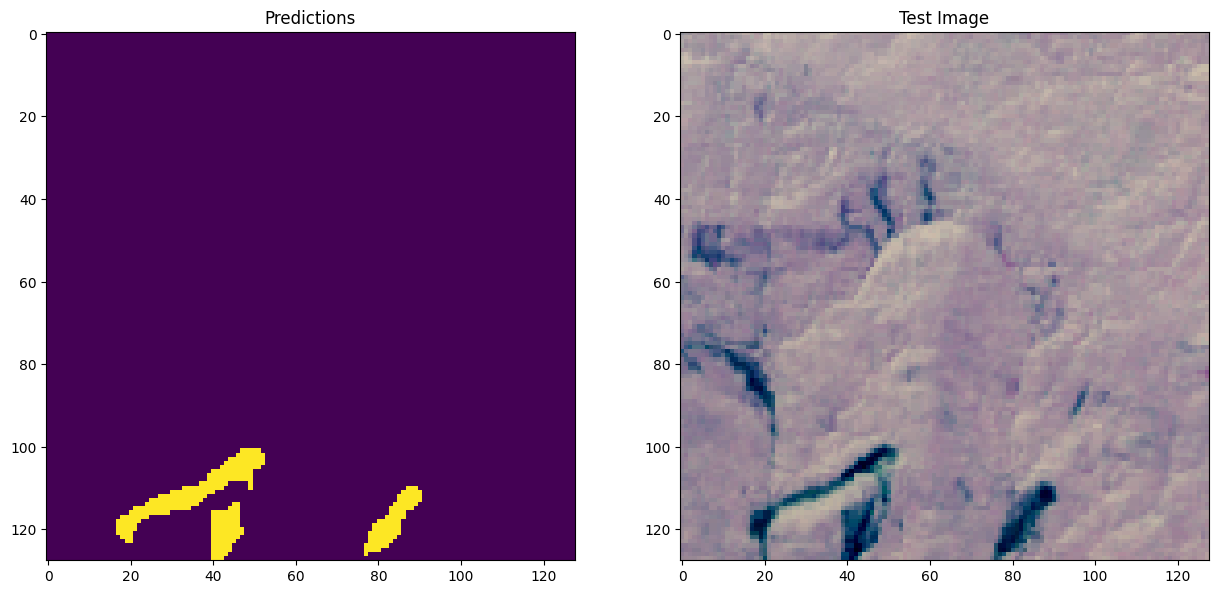

In [ ]:
img = 70
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")

ax2.imshow(TEST_XX[img, :, :, 0:3])
ax2.set_title('Test Image')

In [ ]:
TEST_XX2 = np.zeros((3799, 128, 128, 6))


In [ ]:
def image_reshaping (image_array):
  print("hi")
  print(image_array.shape)
  row = image_array.shape[1]
  column = image_array.shape[2]
  print(row)
  no_of_rows= row/120
  no_of_columns = column/120










In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize


base_path = '/content/drive/MyDrive/nainital_sentinel/sentinel_bands.h5'

band_numbers = [f'B{i:02d}' for i in range(1, 13)]
image_arrays = []


with h5py.File(base_path, 'r') as h5_file:

    for band in band_numbers:

        image_array = h5_file[band][...]
        image_arrays.append(image_array)


min_height = min(arr.shape[0] for arr in image_arrays)
min_width = min(arr.shape[1] for arr in image_arrays)


resized_arrays = []
for arr in image_arrays:
    resized = resize(arr, (min_height, min_width), anti_aliasing=True)
    resized_arrays.append(resized)


image_arrays = np.array(resized_arrays)


print("Shape of image arrays:", image_arrays.shape)

plt.imshow(image_arrays[0], cmap='gray')
plt.title('Resized Band B01')
plt.colorbar()
plt.show()


KeyError: "Unable to synchronously open object (object 'B01' doesn't exist)"

In [ ]:
image_arrays.shape

(12, 1830, 1830)

In [ ]:
mid_rgb = data[1:4,:, :].max() / 2.0
mid_slope = data[12,:, :].max() / 2.0
mid_elevation = data[13, :, :].max() / 2.0


In [ ]:
!pip install scipy

In [ ]:
import h5py
import numpy as np
from scipy.ndimage import zoom


base_path = '/content/drive/MyDrive/nainital_sentinel/slope_data.h5'


with h5py.File(base_path, 'r+') as h5_file:
    for band_name in h5_file.keys():
        dataset = h5_file[band_name][:]
        print(f'Original Dataset: {band_name}, Shape: {dataset.shape}')


        zoom_factor = (256 / dataset.shape[0], 256 / dataset.shape[1])
        resized_dataset = zoom(dataset, zoom_factor, order=3)


        del h5_file[band_name]
        h5_file.create_dataset(band_name, data=resized_dataset)

        print(f'Resized Dataset: {band_name}, New Shape: {resized_dataset.shape}')


Original Dataset: slope, Shape: (512, 512)
Resized Dataset: slope, New Shape: (256, 256)


In [ ]:
import h5py


base_path = '/content/drive/MyDrive/tirupati_sentinel/slope_data.h5'


with h5py.File(base_path, 'r') as h5_file:

      dataset = h5_file['slope']
      print(f'Dataset: , Shape: {dataset}')


Dataset: , Shape: <HDF5 dataset "slope": shape (512, 512), type "<f8">


In [ ]:
import h5py


base_path = '/content/drive/MyDrive/nainital_sentinel/sentinel_bands.h5'


with h5py.File(base_path, 'r') as h5_file:

    dataset = h5_file['sentinel_bands']


    num_bands = dataset.shape[0]
    for i in range(num_bands):
        band_data = dataset[i]
        print(f'Band {i+1}, Shape: {band_data.shape}')

Band 1, Shape: (256, 256)
Band 2, Shape: (256, 256)
Band 3, Shape: (256, 256)
Band 4, Shape: (256, 256)
Band 5, Shape: (256, 256)
Band 6, Shape: (256, 256)
Band 7, Shape: (256, 256)
Band 8, Shape: (256, 256)
Band 9, Shape: (256, 256)
Band 10, Shape: (256, 256)
Band 11, Shape: (256, 256)
Band 12, Shape: (256, 256)
Band 13, Shape: (256, 256)


In [ ]:
import h5py


base_path = '/content/drive/MyDrive/nainital_sentinel/dem_data.h5'


with h5py.File(base_path, 'r') as h5_file:


    dataset = h5_file['']


    num_bands = dataset.shape[0]
    for i in range(num_bands):
        band_data = dataset[i]
        print(f'Band {i+1}, Shape: {band_data.shape}')

KeyError: "Unable to synchronously open object (object 'dem_data' doesn't exist)"

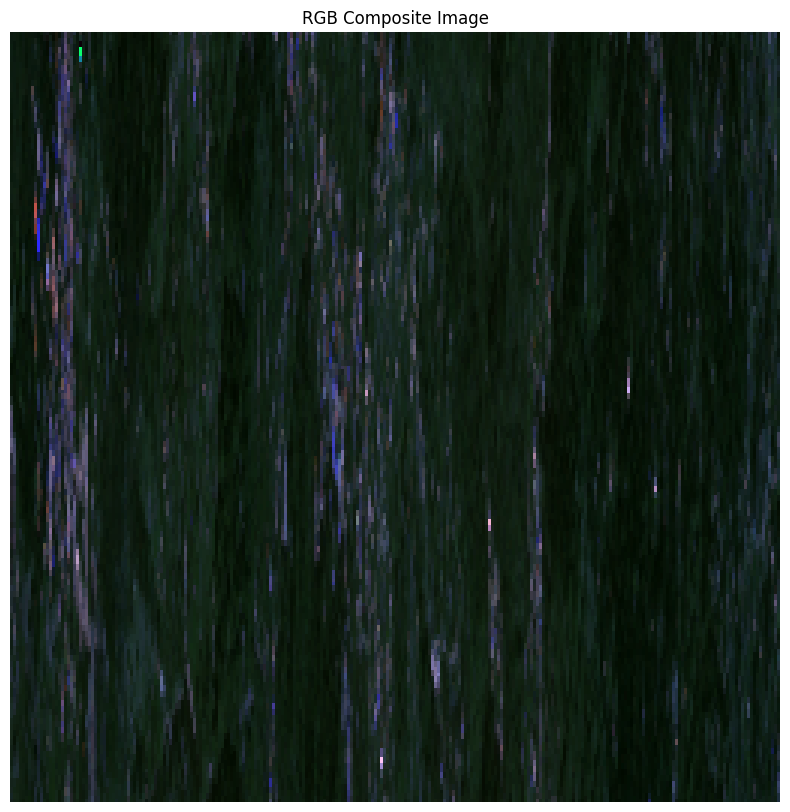

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


base_path = '/content/drive/MyDrive/nainital_sentinel/sentinel_bands.h5'


with h5py.File(base_path, 'r') as h5_file:

    dataset = h5_file['sentinel_bands']


    B04 = dataset[3]
    B03 = dataset[2]
    B02 = dataset[1]


B04_norm = (B04 - np.min(B04)) / (np.max(B04) - np.min(B04))
B03_norm = (B03 - np.min(B03)) / (np.max(B03) - np.min(B03))
B02_norm = (B02 - np.min(B02)) / (np.max(B02) - np.min(B02))


rgb_image = np.stack((B02_norm, B03_norm, B04_norm), axis=-1)


plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.title('RGB Composite Image')
plt.axis('off')
plt.show()


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

TEST_XX2 = np.zeros((1, 128, 128, 6))
base_path = '/content/drive/MyDrive/tirupati_sentinel/sentinel_bands.h5'
base_path2 = '/content/drive/MyDrive/tirupati_sentinel/slope_data.h5'
base_path3 = '/content/drive/MyDrive/tirupati_sentinel/elevation_data.h5'

with h5py.File(base_path, 'r') as h5_file:

    dataset = h5_file['sentinel_bands']


    B04 = dataset[3]  # Red band (Band 4) - index 3
    B03 = dataset[2]  # Green band (Band 3) - index 2
    B02 = dataset[1]  # Blue band (Band 2) - index 1
    B08 = dataset[7]

ndvi = (B08 - B04 )/(B04 + B08)

with h5py.File(base_path2, 'r') as h5_file:
  slope_data = h5_file['slope']

with h5py.File(base_path3,'r') as h5_file:
  elevation_data = h5_file['elevation']







In [ ]:
for i, (img) in enumerate(all_test):

    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))


        data[np.isnan(data)] = 0.000001


        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0


        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


        TEST_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TEST_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TEST_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TEST_XX[i, :, :, 3] = data_ndvi #NDVI
        TEST_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TEST_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION





NameError: name 'all_test' is not defined

In [ ]:
import h5py
import numpy as np


base_path = '/content/drive/MyDrive/nainital_sentinel/sentinel_bands.h5'
base_path2 = '/content/drive/MyDrive/nainital_sentinel/slope_data.h5'
base_path3 = '/content/drive/MyDrive/nainital_sentinel/elevation_data.h5'


TEST_XX2 = np.zeros((16, 128, 128, 6))


with h5py.File(base_path, 'r') as h5_file:
    dataset = h5_file['sentinel_bands']


    B04 = dataset[3]
    B03 = dataset[2]
    B02 = dataset[1]
    B08 = dataset[7]


    ndvi = (B08 - B04) / (B08 + B04)

with h5py.File(base_path2, 'r') as h5_file:
    slope_data = h5_file['slope'][:]

with h5py.File(base_path3, 'r') as h5_file:
    elevation_data = h5_file['elevation'][:]


def split_and_normalize(data_rgb, data_ndvi, data_slope, data_elevation, block_size=128):
    blocks = []
    for i in range(0, data_rgb.shape[0], block_size):
        for j in range(0, data_rgb.shape[1], block_size):
            block_rgb = data_rgb[i:i+block_size, j:j+block_size]
            block_ndvi = data_ndvi[i:i+block_size, j:j+block_size]
            block_slope = data_slope[i:i+block_size, j:j+block_size]
            block_elevation = data_elevation[i:i+block_size, j:j+block_size]


            mid_rgb = block_rgb.max() / 2.0
            mid_slope = block_slope.max() / 2.0
            mid_elevation = block_elevation.max() / 2.0


            mid_rgb = mid_rgb if mid_rgb != 0 else 0.000001
            mid_slope = mid_slope if mid_slope != 0 else 0.000001
            mid_elevation = mid_elevation if mid_elevation != 0 else 0.000001


            block_rgb[:, :, 0] = 1 - np.nan_to_num(block_rgb[:, :, 0] / mid_rgb, nan=0.000001)
            block_rgb[:, :, 1] = 1 - np.nan_to_num(block_rgb[:, :, 1] / mid_rgb, nan=0.000001)
            block_rgb[:, :, 2] = 1 - np.nan_to_num(block_rgb[:, :, 2] / mid_rgb, nan=0.000001)

            block_slope_normalized = 1 - np.nan_to_num(block_slope / mid_slope, nan=0.000001)
            block_elevation_normalized = 1 - np.nan_to_num(block_elevation / mid_elevation, nan=0.000001)

            blocks.append((block_rgb, block_ndvi, block_slope_normalized, block_elevation_normalized))
    return blocks


rgb_combined = np.stack([B04, B03, B02], axis=-1)


blocks = split_and_normalize(rgb_combined, ndvi, slope_data, elevation_data)


for i, (block_rgb, block_ndvi, block_slope, block_elevation) in enumerate(blocks):
    TEST_XX2[i, :, :, 0] = block_rgb[:, :, 0]
    TEST_XX2[i, :, :, 1] = block_rgb[:, :, 1]
    TEST_XX2[i, :, :, 2] = block_rgb[:, :, 2]
    TEST_XX2[i, :, :, 3] = block_ndvi
    TEST_XX2[i, :, :, 4] = block_slope
    TEST_XX2[i, :, :, 5] = block_elevation
output_path = '/content/drive/MyDrive/nainital_sentinel/processed_data.h5'
with h5py.File(output_path, 'w') as h5_out:
    h5_out.create_dataset('TEST_XX2', data=TEST_XX2)

print("Data saved successfully in 'processed_data.h5'")


Data saved successfully in 'processed_data.h5'


In [ ]:
import h5py
import numpy as np


base_path = '/content/drive/MyDrive/tirupati_sentinel/sentinel_bands.h5'
base_path2 = '/content/drive/MyDrive/tirupati_sentinel/slope_data.h5'
base_path3 = '/content/drive/MyDrive/tirupati_sentinel/elevation_data.h5'


TEST_XX2 = np.zeros((16, 128, 128, 6))

with h5py.File(base_path, 'r') as h5_file:
    dataset = h5_file['sentinel_bands']


    B04 = dataset[3]
    B03 = dataset[2]
    B02 = dataset[1]
    B08 = dataset[7]


    ndvi = (B08 - B04) / (B08 + B04)

with h5py.File(base_path2, 'r') as h5_file:
    slope_data = h5_file['slope'][:]

with h5py.File(base_path3, 'r') as h5_file:
    elevation_data = h5_file['elevation'][:]


In [ ]:
TEST_XX2

array([[[[ 0.79934621,  0.68569279,  0.63339204,  0.73628551,
          -0.94324345, -0.77768763],
         [ 0.78979129,  0.66608   ,  0.63590646,  0.72327048,
          -0.94227286, -0.7801217 ],
         [ 0.80890119,  0.67563492,  0.63992965,  0.71862268,
          -0.94035498, -0.78580122],
         ...,
         [ 0.77671611,  0.63992965,  0.60774457,  0.71620321,
          -0.82581467,  0.14726166],
         [ 0.64797586,  0.59869248,  0.55443799,  0.44400313,
          -0.85002463,  0.14401623],
         [ 0.63842094,  0.58008552,  0.54639173,  0.43026939,
          -0.87577175,  0.13995943]],

        [[ 0.79180288,  0.67211467,  0.63842094,  0.71438426,
          -0.94284892, -0.78904665],
         [ 0.78828263,  0.67060602,  0.63138044,  0.70965517,
          -0.94206722, -0.79066937],
         [ 0.80940408,  0.67462909,  0.63590646,  0.73816925,
          -0.94041471, -0.79553753],
         ...,
         [ 0.77671611,  0.63992965,  0.60774457,  0.71620321,
          -0.8234

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/My Drive/model_save.h5')

In [ ]:
threshold = 0.5
pred_img = model.predict(TEST_XX2)
maxi=pred_img.max()
mini = pred_img.min()


pred_img = (pred_img > threshold).astype(np.uint8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Text(0.5, 1.0, 'Test Image')

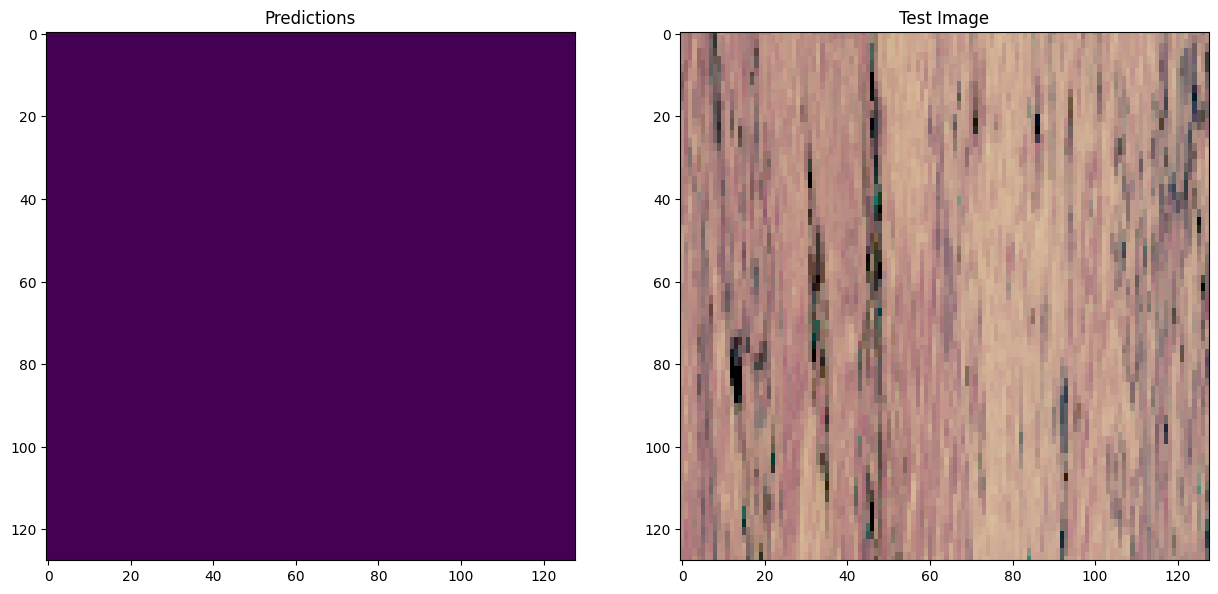

In [ ]:
img = 3
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")

ax2.imshow(TEST_XX2[img, :, :, 0:3])
ax2.set_title('Test Image')

In [ ]:
pred_img

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 20.3 MB/s eta 0:00:00


In [ ]:
import rasterio
import numpy as np


file_path = '/content/drive/My Drive/tirupati_shovik/Sentinel2_Image_3.tif'


with rasterio.open(file_path) as src:
    tif_array = src.read()


print("TIF Array Shape:", tif_array.shape)
print("TIF Array Data Type:", tif_array.dtype)
print("TIF Array Sample Data:", tif_array)

TIF Array Shape: (4, 460, 557)
TIF Array Data Type: float64
TIF Array Sample Data: [[[1513. 1541. 1540. ... 1584. 1516. 1524.]
  [1470. 1449. 1472. ... 1636. 1601. 1598.]
  [1449. 1434. 1449. ... 1619. 1628. 1650.]
  ...
  [2540. 2610. 2844. ... 1475. 1468. 1472.]
  [2906. 3086. 3318. ... 1476. 1460. 1474.]
  [3426. 3614. 4034. ... 1499. 1475. 1426.]]

 [[1652. 1670. 1666. ... 1728. 1725. 1777.]
  [1584. 1562. 1576. ... 1755. 1723. 1794.]
  [1539. 1511. 1505. ... 1758. 1736. 1772.]
  ...
  [2470. 2462. 2712. ... 1557. 1542. 1573.]
  [2808. 2886. 3160. ... 1588. 1558. 1548.]
  [3220. 3390. 3734. ... 1634. 1594. 1531.]]

 [[1603. 1678. 1728. ... 1913. 1694. 1693.]
  [1468. 1483. 1572. ... 1980. 1876. 1888.]
  [1439. 1470. 1493. ... 1946. 1951. 1968.]
  ...
  [2182. 2194. 2444. ... 1398. 1395. 1403.]
  [2510. 2620. 2878. ... 1402. 1399. 1410.]
  [2936. 3132. 3502. ... 1452. 1439. 1408.]]

 [[3166. 3026. 2892. ... 3250. 3546. 3862.]
  [3322. 3032. 2918. ... 3144. 3188. 3346.]
  [3002. 2734

In [ ]:
import rasterio
import numpy as np

file_path2 = '/content/drive/My Drive/tirupati_shovik/coregistered_DEM.tif'


with rasterio.open(file_path2) as src:
    tif_array2 = src.read()

print("TIF Array Shape:", tif_array2.shape)
print("TIF Array Data Type:", tif_array2.dtype)
print("TIF Array Sample Data:", tif_array2)

TIF Array Shape: (1, 460, 557)
TIF Array Data Type: int16
TIF Array Sample Data: [[[ 949  948  946 ...  519  514  510]
  [ 945  943  942 ...  517  513  509]
  [ 941  939  938 ...  515  512  508]
  ...
  [1679 1676 1673 ...  919  917  914]
  [1682 1679 1676 ...  922  919  915]
  [1682 1679 1676 ...  922  919  915]]]


In [ ]:
tif_array[np.isnan(tif_array)] = 0.000001
tif_array2[np.isnan(tif_array2)] = 0.000001

In [ ]:

import numpy as np


dem_data = tif_array2


elevation_array = dem_data[0]


dy, dx = np.gradient(elevation_array)

slope_array = np.arctan(np.sqrt(dx**2 + dy**2))

slope_array_deg = np.degrees(slope_array)

print("Elevation Array Shape:", elevation_array.shape)
print("Slope Array Shape:", slope_array.shape)


Elevation Array Shape: (460, 557)
Slope Array Shape: (460, 557)


In [ ]:
slope_array


array([[1.3328552 , 1.38152409, 1.3328552 , ..., 1.45677339, 1.35717574,
        1.3328552 ],
       [1.35080835, 1.36302032, 1.32763546, ..., 1.46275347, 1.3328552 ,
        1.3328552 ],
       [1.32763546, 1.28104463, 1.25313313, ..., 1.45677339, 1.35717574,
        1.38482615],
       ...,
       [1.33931896, 1.33931896, 1.34235933, ..., 1.30024656, 1.26805038,
        1.26451896],
       [1.28104463, 1.28104463, 1.19028995, ..., 1.24037368, 1.3026894 ,
        1.32763546],
       [1.24904577, 1.24904577, 1.10714872, ..., 1.19028995, 1.29249667,
        1.32581766]])

In [ ]:
slope_array_deg

array([[76.36697777, 79.15549993, 76.36697777, ..., 83.46696692,
        77.7604417 , 76.36697777],
       [77.39561735, 78.09531189, 76.06790845, ..., 83.80960054,
        76.36697777, 76.36697777],
       [76.06790845, 73.3984504 , 71.79923974, ..., 83.46696692,
        77.7604417 , 79.34469395],
       ...,
       [76.73732399, 76.73732399, 76.91152391, ..., 74.49864043,
        72.65393471, 72.45159939],
       [73.3984504 , 73.3984504 , 68.19859051, ..., 71.06817682,
        74.63860461, 76.06790845],
       [71.56505118, 71.56505118, 63.43494882, ..., 68.19859051,
        74.0546041 , 75.96375653]])

In [ ]:
elevation_array

array([[ 949,  948,  946, ...,  519,  514,  510],
       [ 945,  943,  942, ...,  517,  513,  509],
       [ 941,  939,  938, ...,  515,  512,  508],
       ...,
       [1679, 1676, 1673, ...,  919,  917,  914],
       [1682, 1679, 1676, ...,  922,  919,  915],
       [1682, 1679, 1676, ...,  922,  919,  915]], dtype=int16)

In [ ]:
data_nir=tif_array[3,:,:]
data_red=tif_array[0,:,:]


data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

In [ ]:
!pip install richdem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp310-cp310-linux_x86_64.whl size=7844531 sha256=a6c56a1e10343dc415ba3093b547741e552ef175efdbe497d895966cf199d3ab
  Stored in directory: /root/.cache/pip/wheels/01/61/27/5c305116b5cffecf04ed75c40f640e2baf231dae20954e31e0
Successfully built richdem


In [ ]:
import richdem as rd

In [ ]:
file_path = '/content/drive/My Drive/tirupati_shovik/coregistered_DEM.tif'
with rasterio.open(file_path) as src:
    dem_array = src.read(1)
    transform = src.transform


dem_array = dem_array.astype(float)
dem_array[dem_array == src.nodata] = np.nan


dem = rd.rdarray(dem_array, no_data=np.nan)


slope = rd.TerrainAttribute(dem, attrib='slope_radians')
slope_degrees = np.degrees(slope)


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


In [ ]:
slope.shape

(460, 557)

In [ ]:
slope_array=slope

In [ ]:
mid_rgb = tif_array[0:3,:, :].max() / 2.0
mid_slope = slope_array[:, :].max() / 2.0
mid_elevation = elevation_array[:, :].max() / 2.0

In [ ]:
TEST_XX2 = np.zeros((1, 460, 557, 6))

In [ ]:
TEST_XX2[0, :, :, 0] = 1 - tif_array[0,:, :] / mid_rgb  #RED
TEST_XX2[0, :, :, 1] = 1 - tif_array[1,:, :] / mid_rgb #GREEN
TEST_XX2[0, :, :, 2] = 1 - tif_array[2,:, :] / mid_rgb #BLUE
TEST_XX2[0, :, :, 3] = data_ndvi #NDVI
TEST_XX2[0, :, :, 4] = 1 - slope_array[:, :] / mid_slope #SLOPE
TEST_XX2[0, :, :, 5] = 1 - elevation_array[:, :] / mid_elevation #ELEVATION

In [ ]:

TEST_XX3=np.zeros((1, 128, 128, 6))

In [ ]:
TEST_XX3[:,:,:,:]=TEST_XX2[0,256:384,200:328,:]

In [ ]:
TEST_XX3

array([[[[ 0.53658537,  0.49781113,  0.51282051,  0.39237392,
          -0.51491749, -0.13203079],
         [ 0.53658537,  0.5       ,  0.55222014,  0.43391902,
          -0.46176267, -0.13203079],
         [ 0.53095685,  0.47904941,  0.52657911,  0.43967127,
          -0.39735675, -0.13203079],
         ...,
         [ 0.52220138,  0.44652908,  0.51063164,  0.47635367,
          -0.37487078, -0.02664298],
         [ 0.52220138,  0.44652908,  0.51063164,  0.47635367,
          -0.06137741, -0.02901125],
         [ 0.51657286,  0.44746717,  0.50750469,  0.47397074,
           0.40108556, -0.02901125]],

        [[ 0.5478424 ,  0.51156973,  0.54534084,  0.41433779,
          -0.39735675, -0.13439905],
         [ 0.54534084,  0.50750469,  0.55909944,  0.41535987,
          -0.43015373, -0.13439905],
         [ 0.54846779,  0.50531582,  0.5681676 ,  0.42054575,
          -0.43015373, -0.13439905],
         ...,
         [ 0.51282051,  0.45309568,  0.51876173,  0.47240095,
          -0.1574

In [ ]:
threshold = 0.0000002
threshold2 = 0.0000005

pred_img = model.predict(TEST_XX3)
pred_img2 = model.predict(TEST_XX3)

# Correct logical operation using bitwise '&'
pred_img = ((pred_img > threshold) & (pred_img < threshold2)).astype(np.uint8)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Text(0.5, 1.0, 'Test Image')

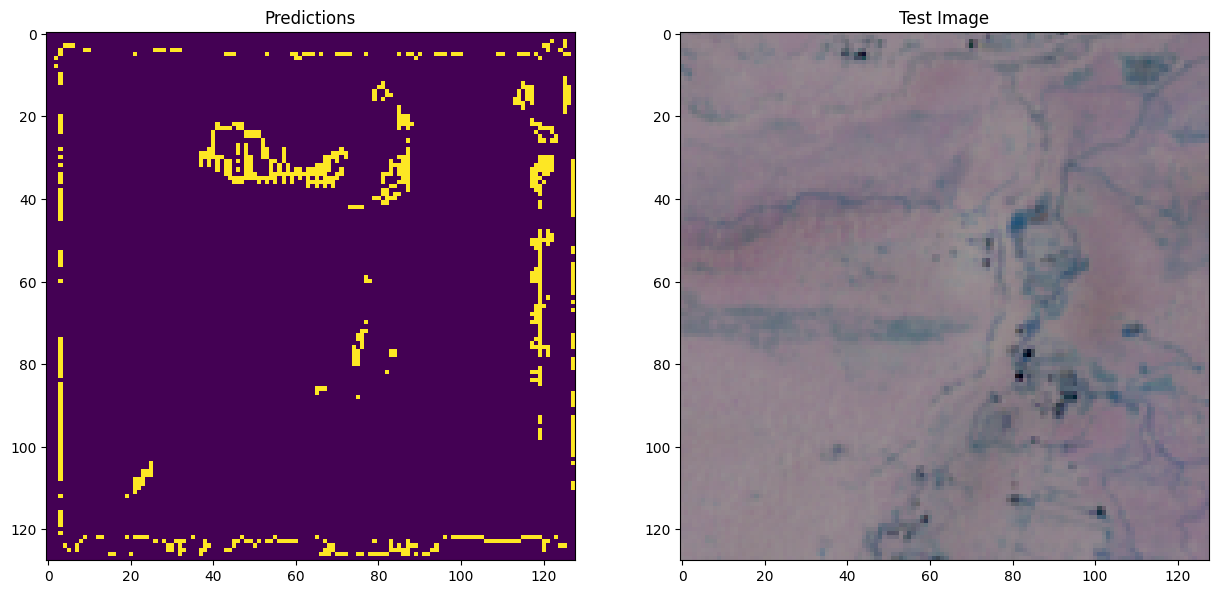

In [ ]:
img = 65
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[0, :, :, 0])
ax1.set_title("Predictions")

ax2.imshow(TEST_XX3[0, :, :, 2::-1])
ax2.set_title('Test Image')

In [ ]:
pred_img2

array([[[[3.0378681e-03],
         [4.8648808e-04],
         [6.1898970e-04],
         ...,
         [1.7208877e-05],
         [2.1333717e-05],
         [2.2073997e-04]],

        [[1.7771764e-04],
         [8.3292643e-06],
         [8.8850884e-06],
         ...,
         [8.8859423e-07],
         [1.2005833e-06],
         [2.7573722e-05]],

        [[3.5345267e-05],
         [1.4128755e-06],
         [1.6707115e-06],
         ...,
         [2.0647556e-07],
         [2.0240317e-07],
         [2.1415744e-06]],

        ...,

        [[1.7805654e-04],
         [6.1554179e-06],
         [6.8985050e-06],
         ...,
         [5.3990252e-06],
         [2.9196513e-06],
         [2.3106773e-05]],

        [[2.7202026e-04],
         [4.6114365e-06],
         [4.4706239e-06],
         ...,
         [2.9097677e-05],
         [1.6857148e-05],
         [1.2657195e-04]],

        [[9.1533437e-03],
         [6.7764864e-04],
         [4.5246191e-04],
         ...,
         [1.2678576e-03],
        

In [ ]:
TEST_XX = np.zeros((1, 128, 128, 6))

In [ ]:
for i, (img) in enumerate(all_test):

    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))


        data[np.isnan(data)] = 0.000001


        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0


        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


        TEST_XX[0, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TEST_XX[0, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TEST_XX[0, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TEST_XX[0, :, :, 3] = data_ndvi #NDVI
        TEST_XX[0, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TEST_XX[0, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

<ipython-input-206-028bfe7ff2f6>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


In [ ]:
threshold = 0.5
pred_img = model.predict(TEST_XX)

pred_img = (pred_img > threshold).astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Text(0.5, 1.0, 'Test Image')

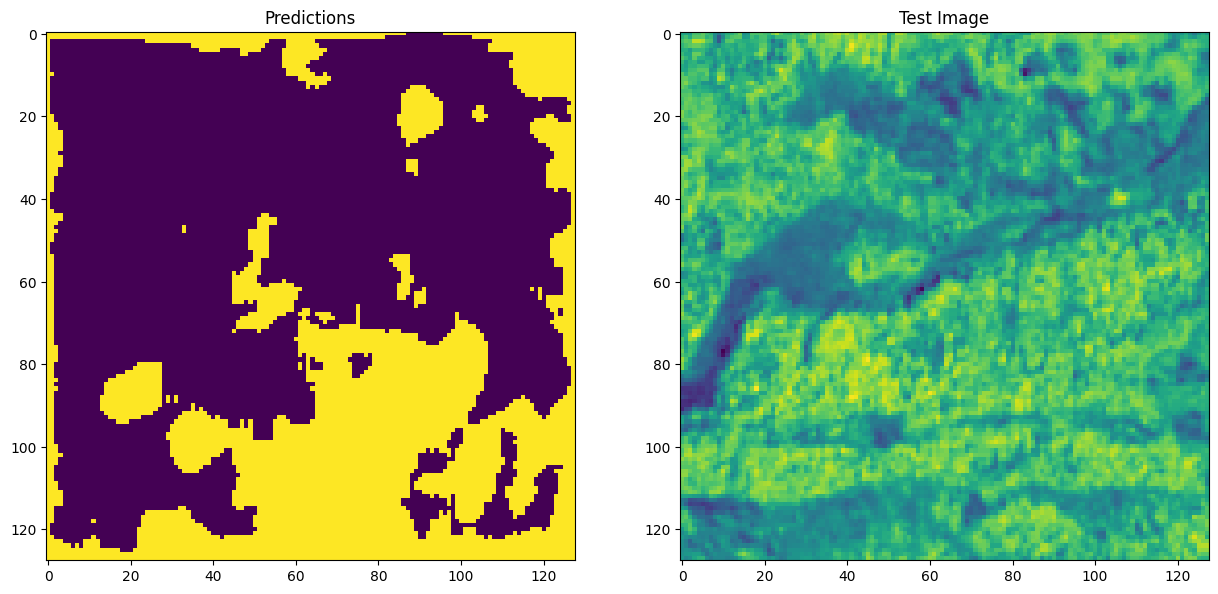

In [ ]:
img = 65
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[0, :, :, 0])
ax1.set_title("Predictions")

ax2.imshow(TEST_XX3[0, :, :, 3])
ax2.set_title('Test Image')

In [ ]:
TEST_XX

array([[[[ 0.48796069,  0.4862574 ,  0.54743257,  0.1426434 ,
           0.19230769, -0.91240876],
         [ 0.50663391,  0.49680924,  0.55432985,  0.14505855,
           0.23076923, -0.91240876],
         [ 0.51547912,  0.51659394,  0.56441048,  0.04020457,
           0.23076923, -0.91403082],
         ...,
         [ 0.54889435,  0.53571914,  0.55061593,  0.1167934 ,
          -0.11538462, -0.69829684],
         [ 0.53120393,  0.4994472 ,  0.54849369,  0.13366719,
          -0.11538462, -0.68856448],
         [ 0.50761671,  0.48361944,  0.54690201,  0.13195373,
          -0.19230769, -0.67721006]],

        [[ 0.4977887 ,  0.47504607,  0.55486041,  0.21939622,
           0.19230769, -0.91240876],
         [ 0.4977887 ,  0.47702454,  0.55432985,  0.20306497,
           0.23076923, -0.91240876],
         [ 0.4997543 ,  0.48559791,  0.55486041,  0.15128846,
           0.23076923, -0.91403082],
         ...,
         [ 0.51646192,  0.50472312,  0.53576026,  0.11716276,
          -0.1153

In [ ]:
TEST_XX3

array([[[[ 0.51407129,  0.44277674,  0.45465916,  0.40230769,
          -0.99849566, -0.9408452 ],
         [ 0.52908068,  0.47873671,  0.48530331,  0.42054636,
          -0.98082998,  0.99926726],
         [ 0.52657911,  0.47904941,  0.47592245,  0.41249515,
          -0.99767842, -0.70767401],
         ...,
         [ 0.53752345,  0.50093809,  0.54534084,  0.39397664,
          -0.99777601,  0.09671539],
         [ 0.54377736,  0.49280801,  0.54409006,  0.36853495,
          -0.90960156,  0.60980287],
         [ 0.53721076,  0.49186992,  0.5409631 ,  0.3514461 ,
          -0.99542225,  0.14751739]],

        [[ 0.53783615,  0.49718574,  0.53001876,  0.43716679,
          -0.99283167, -0.66921857],
         [ 0.5478424 ,  0.50469043,  0.54252658,  0.469163  ,
          -0.99896038,  0.40298496],
         [ 0.5409631 ,  0.48780488,  0.52532833,  0.45750185,
          -0.98493216,  0.91509004],
         ...,
         [ 0.52908068,  0.48905566,  0.53377111,  0.40380048,
          -0.9962

In [ ]:
pred_img2

array([[[[1.64337934e-03],
         [7.55779256e-05],
         [1.27684674e-04],
         ...,
         [4.19705553e-04],
         [6.73097034e-04],
         [3.90690984e-03]],

        [[9.65520594e-05],
         [7.57513772e-06],
         [1.03678885e-05],
         ...,
         [2.00989001e-04],
         [3.01398337e-04],
         [1.86411093e-03]],

        [[2.54728202e-05],
         [8.02201725e-07],
         [1.10824647e-06],
         ...,
         [7.57536181e-05],
         [2.55606923e-04],
         [1.67803024e-03]],

        ...,

        [[2.87928997e-04],
         [4.26067709e-05],
         [9.73438582e-05],
         ...,
         [1.44737744e-04],
         [1.32879039e-04],
         [4.03269136e-04]],

        [[9.06485831e-04],
         [2.01723538e-04],
         [4.58778930e-04],
         ...,
         [4.51565691e-04],
         [3.15071666e-04],
         [9.57737735e-04]],

        [[1.86306145e-02],
         [6.73296489e-03],
         [7.32473051e-03],
         ...,
 